# IBM Applied Data Science Capstone Course by Coursera¶


### Opening a New Shopping Mall in Bhubaneswar, India

- Build a dataframe of neighborhoods in Bhubaneswar, India by web scraping the data from Wikipedia page
- Get the geographical coordinates of the neighborhoods
- Obtain the venue data for the neighborhoods from Foursquare API
- Explore and cluster the neighborhoods
- Select the best cluster to open a new shopping mall

#### Import libraries

In [65]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
import requests
import io
print("Libraries imported.")

Libraries imported.


#### Scrap data from Wikipedia page into a DataFrame

In [70]:
url = "https://raw.githubusercontent.com/dasrasmikant/Coursera_Capstone/main/Neighbourhood.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe

print (df.head())

      Neighbourhood
0      Bapuji Nagar
1          Andharua
2         BJB Nagar
3           Hanspal
4  Badaraghunathpur


In [71]:
def get_latilong(location):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Bhubaneswar, Odisha'.format(location))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('Bapuji Nagar')

[20.26150000000007, 85.83193000000006]

In [72]:
# Retrieving Postal Code Co-ordinates
location_names = df['Neighbourhood']
#coords = [get_latilong(location_name) for location_name in location_names.tolist() ]
coords=[]
for location_name in location_names.tolist():    
    print(location_name,get_latilong(location_name))
    coords.append(get_latilong(location_name))

Bapuji Nagar [20.26150000000007, 85.83193000000006]
Andharua [20.319890000000044, 85.77184000000005]
BJB Nagar [20.251050000000077, 85.84402000000006]
Hanspal [20.31746000000004, 85.88205000000005]
Badaraghunathpur [20.227350000000058, 85.73241000000007]
Chandaka [20.366970000000038, 85.76606000000004]
Orakal [20.268790000000024, 85.84100000000007]
Baramunda [20.271310000000028, 85.80236000000008]
Chandrasekharpur [20.327420000000075, 85.81540000000007]
Mancheswar [20.321920000000034, 85.84625000000005]
Bharatpur [20.30320000000006, 85.77822000000003]
Gajapati Nagar [20.31224000000003, 85.82811000000004]
Jatani [20.249900000000025, 85.82577000000003]
Khordha [20.268790000000024, 85.84100000000007]
Patia [20.355300000000057, 85.82766000000004]
Kalinga Nagar [20.267270000000053, 85.75958000000008]
Madhusudan Nagar [20.284050000000036, 85.83210000000008]
Patrapada [20.242850000000033, 85.76710000000008]
Khandagiri [20.26231000000007, 85.78550000000007]
Nayapalli [20.288800000000037, 85.81

In [73]:
# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']
print(df)

       Neighbourhood  Latitude  Longitude
0       Bapuji Nagar  20.26150   85.83193
1           Andharua  20.31989   85.77184
2          BJB Nagar  20.25105   85.84402
3            Hanspal  20.31746   85.88205
4   Badaraghunathpur  20.22735   85.73241
5           Chandaka  20.36697   85.76606
6             Orakal  20.26879   85.84100
7          Baramunda  20.27131   85.80236
8   Chandrasekharpur  20.32742   85.81540
9         Mancheswar  20.32192   85.84625
10         Bharatpur  20.30320   85.77822
11    Gajapati Nagar  20.31224   85.82811
12            Jatani  20.24990   85.82577
13           Khordha  20.26879   85.84100
14             Patia  20.35530   85.82766
15     Kalinga Nagar  20.26727   85.75958
16  Madhusudan Nagar  20.28405   85.83210
17         Patrapada  20.24285   85.76710
18        Khandagiri  20.26231   85.78550
19         Nayapalli  20.28880   85.81258
20       Phulnakhara  20.26879   85.84100
21   Kharavela Nagar  20.27576   85.83971
22          Old Town  20.24009   8

In [74]:
location=get_latilong('Bhubaneswar')
latitude_x = location[0]
longitude_y = location[1]
print('The Geograpical Co-ordinate of Bhubaneswar Odisha are {}, {}.'.format(latitude_x, longitude_y))


The Geograpical Co-ordinate of Bhubaneswar Odisha are 20.268790000000024, 85.84100000000007.


In [75]:
map_Bhubaneswar = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Bhubaneswar)  
    
map_Bhubaneswar

In [76]:
# @hiddel_cell
CLIENT_ID = 'DPBYY4JUY3DU20ALPSUV4ONY2K1GOJJKJ1NIHBB32XEMOVYY' # my Foursquare ID
CLIENT_SECRET = '1MV443TYEP4HUO0WDUW5NQ5W10L2Y4G05NWG11WIR3NUGC5B' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: DPBYY4JUY3DU20ALPSUV4ONY2K1GOJJKJ1NIHBB32XEMOVYY
CLIENT_SECRET: 1MV443TYEP4HUO0WDUW5NQ5W10L2Y4G05NWG11WIR3NUGC5B


In [77]:
radius = 30000 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_x, 
   longitude_y, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [78]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

<ipython-input-78-86d74ecd55ea>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.postalCode',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.neighborhood'],
      dtype='object')

In [79]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

####  Nearby Venues/Locations

In [80]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Mayfair Lagoon Hotel,"[{'id': '4bf58dd8d48988d12f951735', 'name': 'R...",20.301011,85.819437
1,Appetite,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",20.291900,85.843102
2,Ekamra Haat,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",20.277213,85.840173
3,Keshari Talkies (Cinema Hall),"[{'id': '4bf58dd8d48988d17e941735', 'name': 'I...",20.275055,85.835213
4,The Cellar,"[{'id': '52e81612bcbc57f1066b7a06', 'name': 'I...",20.300256,85.819252


####  Categories of Nearby Venues/Locations

In [81]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Mayfair Lagoon Hotel,Resort,20.301011,85.819437
1,Appetite,Fast Food Restaurant,20.291900,85.843102
2,Ekamra Haat,Park,20.277213,85.840173
3,Keshari Talkies (Cinema Hall),Indie Movie Theater,20.275055,85.835213
4,The Cellar,Irish Pub,20.300256,85.819252


In [82]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Coffee Shop             6
Hotel                   5
Pizza Place             4
Shopping Mall           3
Fast Food Restaurant    3
Indian Restaurant       3
Italian Restaurant      3
Café                    3
Multiplex               2
Clothing Store          2
Name: categories, dtype: int64

In [83]:
def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [84]:
# Nearby Venues
bhubaneswar_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Bapuji Nagar
Andharua
BJB Nagar
Hanspal
Badaraghunathpur
Chandaka
Orakal
Baramunda
Chandrasekharpur
Mancheswar
Bharatpur
Gajapati Nagar
Jatani
Khordha
Patia
Kalinga Nagar
Madhusudan Nagar
Patrapada
Khandagiri
Nayapalli
Phulnakhara
Kharavela Nagar
Old Town
Raghunathpur
Rasulgarh
Urali
Balianta
Rasulgarh Square
Uttara
Barakuda
Shankarpur
Acharya Vihar
Bhagabatipur
Sundarpada
Arya Village
Bijipur
Brahmeswarpatna
Jagamara
Jayadev Vihar
Ganga Nagar
Jagmohan Nagar
Jayarsasan
Gopabandhu Nagar
Jamujhari
Jharapada
Gothapatna
Janla
Keshari Nagar
Laxmi Sagar
Rudrapur
Madanpur
Sahid Nagar
Pahala
Satya Nagar
Pokhariput
Satyabhamapur


In [85]:
print(bhubaneswar_venues.head())

   Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Bapuji Nagar                20.2615                85.83193   
1  Bapuji Nagar                20.2615                85.83193   
2  Bapuji Nagar                20.2615                85.83193   
3  Bapuji Nagar                20.2615                85.83193   
4  Bapuji Nagar                20.2615                85.83193   

                           Venue  Venue Latitude  Venue Longitude  \
0           Mayfair Lagoon Hotel       20.301011        85.819437   
1                       Appetite       20.291900        85.843102   
2                     The Cellar       20.300256        85.819252   
3                 The Presidency       20.288161        85.812079   
4  Keshari Talkies (Cinema Hall)       20.275055        85.835213   

         Venue Category  
0                Resort  
1  Fast Food Restaurant  
2             Irish Pub  
3                 Hotel  
4   Indie Movie Theater  


In [86]:
print('There are {} Uniques Categories.'.format(len(bhubaneswar_venues['Venue Category'].unique())))
bhubaneswar_venues.groupby('Neighborhood').count().head()

There are 35 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acharya Vihar,60,60,60,60,60,60
Andharua,60,60,60,60,60,60
Arya Village,59,59,59,59,59,59
BJB Nagar,61,61,61,61,61,61
Badaraghunathpur,62,62,62,62,62,62


#### One Hot Encoding of Features

In [87]:
# one hot encoding
Bhubaneswar_onehot = pd.get_dummies(bhubaneswar_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bhubaneswar_onehot['Neighborhood'] = bhubaneswar_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Bhubaneswar_onehot.columns[-1]] + list(Bhubaneswar_onehot.columns[:-1])
Bhubaneswar_onehot = Bhubaneswar_onehot[fixed_columns]
Bhubaneswar_grouped = Bhubaneswar_onehot.groupby('Neighborhood').mean().reset_index()
Bhubaneswar_onehot.head(5)

,Neighborhood,Airport,Asian Restaurant,Bakery,Beach,Burger Joint,Burrito Place,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cricket Ground,Department Store,Event Space,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,Hindu Temple,Historic Site,Hotel,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Movie Theater,Multiplex,Park,Pizza Place,Resort,Restaurant,Sandwich Place,Shopping Mall,Train Station,Zoo
0,Bapuji Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Bapuji Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bapuji Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Bapuji Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bapuji Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
num_top_venues = 5
for hood in Bhubaneswar_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =Bhubaneswar_grouped[Bhubaneswar_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Acharya Vihar ----
                  venue  freq
0           Coffee Shop  0.10
1                 Hotel  0.08
2           Pizza Place  0.07
3                  Café  0.05
4  Fast Food Restaurant  0.05


---- Andharua ----
                  venue  freq
0           Coffee Shop  0.10
1                 Hotel  0.08
2           Pizza Place  0.07
3                  Café  0.05
4  Fast Food Restaurant  0.05


---- Arya Village ----
                  venue  freq
0           Coffee Shop  0.10
1                 Hotel  0.08
2           Pizza Place  0.07
3                  Café  0.05
4  Fast Food Restaurant  0.05


---- BJB Nagar ----
                  venue  freq
0           Coffee Shop  0.10
1                 Hotel  0.08
2           Pizza Place  0.07
3                  Café  0.05
4  Fast Food Restaurant  0.05


---- Badaraghunathpur ----
                  venue  freq
0           Coffee Shop  0.10
1                 Hotel  0.08
2           Pizza Place  0.08
3                  Café  0.05
4  Fast F

In [89]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Most Common venues near neighborhood


In [90]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Bhubaneswar_grouped['Neighborhood']

for ind in np.arange(Bhubaneswar_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bhubaneswar_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acharya Vihar,Coffee Shop,Hotel,Pizza Place,Shopping Mall,Fast Food Restaurant,Italian Restaurant,Café,Indian Restaurant,Clothing Store,Sandwich Place
1,Andharua,Coffee Shop,Hotel,Pizza Place,Shopping Mall,Fast Food Restaurant,Italian Restaurant,Café,Indian Restaurant,Clothing Store,Sandwich Place
2,Arya Village,Coffee Shop,Hotel,Pizza Place,Italian Restaurant,Indian Restaurant,Café,Fast Food Restaurant,Shopping Mall,Park,Multiplex
3,BJB Nagar,Coffee Shop,Hotel,Pizza Place,Shopping Mall,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Café,Clothing Store,Sandwich Place
4,Badaraghunathpur,Coffee Shop,Pizza Place,Hotel,Café,Shopping Mall,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Sandwich Place,Asian Restaurant


#### K-Means Clustering Approach

In [91]:
# Using K-Means to cluster neighborhood into 3 clusters
Bhubaneswar_grouped_clustering = Bhubaneswar_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Bhubaneswar_grouped_clustering)
kmeans.labels_

array([1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0])

In [92]:
print(df)

       Neighbourhood  Latitude  Longitude
0       Bapuji Nagar  20.26150   85.83193
1           Andharua  20.31989   85.77184
2          BJB Nagar  20.25105   85.84402
3            Hanspal  20.31746   85.88205
4   Badaraghunathpur  20.22735   85.73241
5           Chandaka  20.36697   85.76606
6             Orakal  20.26879   85.84100
7          Baramunda  20.27131   85.80236
8   Chandrasekharpur  20.32742   85.81540
9         Mancheswar  20.32192   85.84625
10         Bharatpur  20.30320   85.77822
11    Gajapati Nagar  20.31224   85.82811
12            Jatani  20.24990   85.82577
13           Khordha  20.26879   85.84100
14             Patia  20.35530   85.82766
15     Kalinga Nagar  20.26727   85.75958
16  Madhusudan Nagar  20.28405   85.83210
17         Patrapada  20.24285   85.76710
18        Khandagiri  20.26231   85.78550
19         Nayapalli  20.28880   85.81258
20       Phulnakhara  20.26879   85.84100
21   Kharavela Nagar  20.27576   85.83971
22          Old Town  20.24009   8

In [93]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
print(neighborhoods_venues_sorted)

    Cluster Labels      Neighborhood 1st Most Common Venue  \
0                1     Acharya Vihar           Coffee Shop   
1                1          Andharua           Coffee Shop   
2                1      Arya Village           Coffee Shop   
3                0         BJB Nagar           Coffee Shop   
4                2  Badaraghunathpur           Coffee Shop   
5                1          Balianta           Coffee Shop   
6                0      Bapuji Nagar           Coffee Shop   
7                0          Barakuda           Coffee Shop   
8                1         Baramunda           Coffee Shop   
9                2      Bhagabatipur                 Hotel   
10               1         Bharatpur           Coffee Shop   
11               1           Bijipur           Coffee Shop   
12               2   Brahmeswarpatna           Coffee Shop   
13               1          Chandaka           Coffee Shop   
14               1  Chandrasekharpur           Coffee Shop   
15      

In [94]:
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Bhubaneswar_merged =df.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Bhubaneswar_merged = Bhubaneswar_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

Bhubaneswar_merged.head()# check the last columns!

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bapuji Nagar,20.26150,85.83193,0,Coffee Shop,Hotel,Pizza Place,Italian Restaurant,Indian Restaurant,Café,Fast Food Restaurant,Shopping Mall,Park,Multiplex
1,Andharua,20.31989,85.77184,1,Coffee Shop,Hotel,Pizza Place,Shopping Mall,Fast Food Restaurant,Italian Restaurant,Café,Indian Restaurant,Clothing Store,Sandwich Place
2,BJB Nagar,20.25105,85.84402,0,Coffee Shop,Hotel,Pizza Place,Shopping Mall,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Café,Clothing Store,Sandwich Place
3,Hanspal,20.31746,85.88205,1,Coffee Shop,Hotel,Pizza Place,Italian Restaurant,Indian Restaurant,Café,Fast Food Restaurant,Shopping Mall,Park,Multiplex
4,Badaraghunathpur,20.22735,85.73241,2,Coffee Shop,Pizza Place,Hotel,Café,Shopping Mall,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Sandwich Place,Asian Restaurant


#### Map of Clusters

In [95]:
kclusters = 10

In [97]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Bhubaneswar_merged['Latitude'], 
                                   Bhubaneswar_merged['Longitude'], 
                                   Bhubaneswar_merged['Neighbourhood'], 
                                   Bhubaneswar_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [98]:
df1=Bhubaneswar_merged.loc[Bhubaneswar_merged['Cluster Labels'] == 0,Bhubaneswar_merged.columns[[2] + list(range(5, Bhubaneswar_merged.shape[1]))]]
df2=Bhubaneswar_merged.loc[Bhubaneswar_merged['Cluster Labels'] == 1,Bhubaneswar_merged.columns[[2] + list(range(5, Bhubaneswar_merged.shape[1]))]]
df3=Bhubaneswar_merged.loc[Bhubaneswar_merged['Cluster Labels'] == 2,Bhubaneswar_merged.columns[[2] + list(range(5, Bhubaneswar_merged.shape[1]))]]

In [100]:
Bhubaneswar_Avg_HousingPrice=pd.DataFrame({"Neighborhood":df["Neighbourhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0
                                                              
                                                              
                                                              
                                                              ]})

In [101]:
Bhubaneswar_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

<AxesSubplot:xlabel='Neighborhood'>

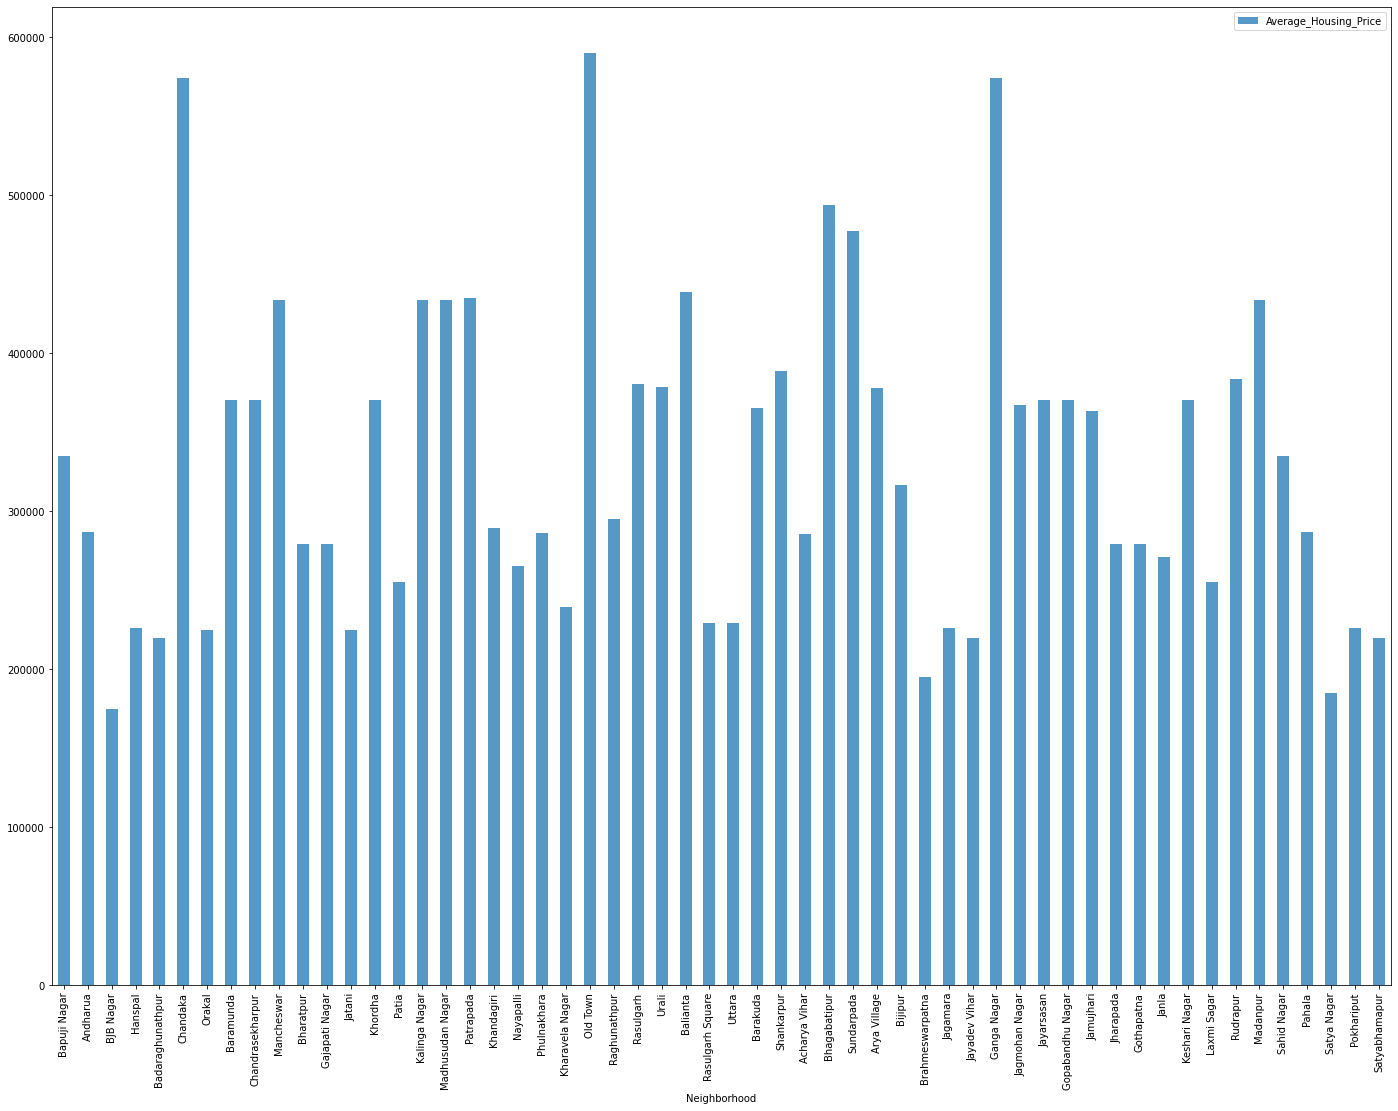

In [102]:
Bhubaneswar_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

#### School Rating by Clusters

In [108]:
print (df2)

    Longitude 2nd Most Common Venue 3rd Most Common Venue  \
1    85.77184                 Hotel           Pizza Place   
3    85.88205                 Hotel           Pizza Place   
5    85.76606                 Hotel           Pizza Place   
7    85.80236                 Hotel           Pizza Place   
8    85.81540                 Hotel           Pizza Place   
9    85.84625                 Hotel           Pizza Place   
10   85.77822                 Hotel           Pizza Place   
11   85.82811                 Hotel           Pizza Place   
14   85.82766                 Hotel           Pizza Place   
15   85.75958                 Hotel           Pizza Place   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1          Shopping Mall  Fast Food Restaurant    Italian Restaurant   
3     Italian Restaurant     Indian Restaurant                  Café   
5          Shopping Mall  Fast Food Restaurant    Italian Restaurant   
7     Italian Restaurant     Indian Rest

In [105]:
clusters=pd.DataFrame({"Cluster1":df1["Neighbourhood"],
                      "Cluster2":df2["Neighbourhood"],
                      "Cluster4":df3["Neighbourhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

KeyError: 'Neighbourhood'